<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/vijkar_development/Project%204/Assignment_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourth and final iteration

Up until the previous we had added the following components to the barebones model built in the first iteration

1. Saving the best model parameters to a file and restoring it at the end of training
2. Batch normalization
3. Dropout

With the above we ensured we always saved the best model through the training process and overcame overfitting to a considerable extent

What issues remain at this point and what scope is there for improvement?

1. Constant learning rates and step sizes through out the training process
<br>As the training phase moves forward, the loss function value decreases with time. With lower loss function values, one should take smaller step sizes. In our current setup there is a constant learning rate ( 0.001 ) and proportional step size. This shows up in that when the optimizer is trying to converge to a minima, the step sizes are so large that they escape the minima and go outside. To control this issue we need a learning rate scheduler. In this case we use a scheduler where the learning rate is inversely proportional to the number of epochs passed. Hence we start off with larger learning rates and use smaller step sizes later in the training.
2. Slow start to the learning process
<br>We often observe that the optimizer takes several epochs to get to even 99% training accuracy and the loss function values at this point are very high (0.03 - 1). This could be improved if initially we use a larger learning rate and later taper the learning rate down. By deafult the adam optimizer uses a learning rate of 0.01. We increase it to 0.03
3. Batch sizes not optimized yet
We havent tweaked with the batch sizes. The ideal batch size is specific to a dataset and depends on the amount of inter and intra class variance in the dataset. After some experimenation ( and as mentioned in the class ), a batch size of 128 works best.

### What changes are being implemented in this iteration

1. LR scheduler
<br>We implement an LR scheduler that makes the learning rate inversely proportional to the number of epochs passed.
2. Optimizer initialization with explicit learning rate
<br>The default learning rate for Adam is 0.001. We explicitly set it to 0.003
3. Batch size tweaking
<br>We change the batch size from 32 to 128.

### High level stats
Total number of params: 8,154 
<br>Total number of trainable params: 7,966 
<br>Validation accuracy: 99.41% 
<br>Training accuracy: 99.60%


# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Installing Keras and importing into current runtime environment

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Importing libraries and functions required for the program

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Loading the MNIST dataset. Note that this dataset comes with a ready made train and test set.

(60000, 28, 28)


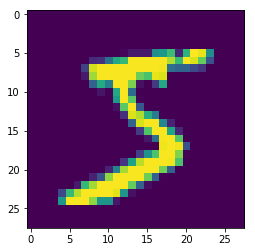

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Visualizing the first training image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Reshaping images from 28x28 to 28x28x1. This change needs to be done since convolution expects a 3 dimensional matrix.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Bringing the values of pixels to 0-255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Checking out the first ten labels on the training set. Note that these are numbers at this point. More importantly these numbers have an ordinality amongst them

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Converting the numerical labels to categorical values. This is important since the classes 0-9 are just different classes and have no inherent order amongst them ( i.e 7 is not a lesser class than 8 in any way with respect to digit classification )

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Seeing the categorical representation of the labels for the first ten training images

In [10]:
from keras.layers import Activation, BatchNormalization, Dropout
dropout_rate = 0.1


model = Sequential()

# Convolution block 
model.add(Convolution2D(10, (3, 3), activation='relu', input_shape=(28,28,1))) #3x3x1x10 kernel - 26x26x10 image - Receptive Field 3x3
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x10x16 kernel - 24x24x16 image - Receptive Field 5x5
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 12x12x16 image - Receptive Field 10x10
model.add(Convolution2D(10, (1,1), activation='relu')) # 1x1x16x8 kernel - 12x12x8 image - Receptive Field 10x10
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

#Convolution block
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x8x16 kernel - 10x10x16 image - Receptive Field 12x12
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x16x16 kernel - 8x8x16 image - Receptive Field 14x14
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 4x4x16 image - Receptive Field 28x28
model.add(Convolution2D(10, (1,1), activation='relu')) # 1x1x16x8 kernel - 4x4x10 image - Receptive Field 28x28
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

#Convolution block
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x16x16 kernel - 2x2x16 image - Receptive Field 28x28
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Convolution2D(10, (2, 2))) # 2x2x16x10 kernel - 1x1x10 image

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


No changes here compared to the previous iteration

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
__________

In [0]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

Compiling the model for training. Note the explicit setting of learning rate for the Adam optimizer.

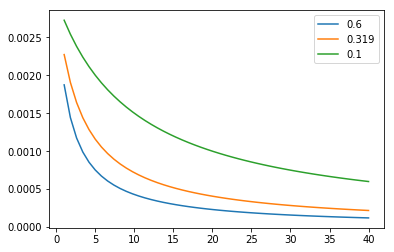

In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

x = np.linspace(1,40)

plt.plot(x, np.round(0.003 * 1/(1 + 0.6 * x), 10), label = '0.6')
plt.plot(x, np.round(0.003 * 1/(1 + 0.319* x), 10), label = '0.319')
plt.plot(x, np.round(0.003 * 1/(1 + 0.1* x), 10), label = '0.1')
plt.legend()

Plotting the LR scheduler function for different scaling factors in the denominator. After some experimentation chose 0.1 since we needed a smoother and slower drop of learning rate. If the learning rate drops too soon then we spend more epocsh just getting to 99% training/validation accuracy.

In [14]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.1 * epoch), 10)

filepath="weights.iter4.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]

model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks = callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 10s 165us/step - loss: 0.3103 - acc: 0.9047 - val_loss: 0.0680 - val_acc: 0.9801

Epoch 00001: val_acc improved from -inf to 0.98010, saving model to weights.best.hdf5
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0027272727.
60000/60000 [==============================] - 7s 110us/step - loss: 0.0909 - acc: 0.9719 - val_loss: 0.0557 - val_acc: 0.9814

Epoch 00002: val_acc improved from 0.98010 to 0.98140, saving model to weights.best.hdf5
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0025.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0727 - acc: 0.9781 - val_loss: 0.0537 - val_acc: 0.9825

Epoch 00003: val_acc improved from 0.98140 to 0.98250, saving model to weights.best.hdf5
Epoch 4/

After 30 epochs, the max validation accuracy reached was 99.21%. Note the added callback for the LR scheduler and the modified batch size.

In [0]:
model.load_weights("weights.iter4.best.hdf5")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Loading the best model weights ( according to validation accuracty ) stored during the training phase

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Evaluate the model on the testing dataset

In [17]:
print(score)

[0.021767143284808846, 0.9941]


Printing the score of the model on the testing dataset. The first number is the value of the loss function. The latter is the test accuracy.

In [18]:
model.evaluate(X_train, Y_train, verbose=0)

[0.013033069100294475, 0.9959833333333333]

Evaluating the model on the training dataset to see what the achieved training accuracy is.

In [0]:
y_pred = model.predict(X_test)

Computing the predicted classifications for the testing dataset

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[8.8409619e-10 4.2325391e-07 4.8773938e-08 2.4092547e-08 4.5385285e-08
  1.5100630e-10 1.1547233e-12 9.9999940e-01 2.9636851e-10 1.5345829e-07]
 [1.0642779e-06 4.6228783e-05 9.9994552e-01 1.7426057e-06 1.0561879e-06
  1.3096253e-09 2.3275404e-06 1.4482034e-06 5.2869234e-07 4.5851878e-09]
 [7.1919000e-09 9.9999475e-01 1.5276734e-07 5.9848313e-09 1.5994168e-06
  4.5432864e-07 4.7920042e-07 2.4325570e-06 5.3277248e-08 3.1452561e-08]
 [9.9999523e-01 8.5077216e-09 6.3753327e-09 3.1061702e-09 2.5723370e-09
  2.6524294e-08 4.5019669e-06 7.9440721e-09 9.9236289e-08 1.3640411e-07]
 [5.8925330e-12 1.1664880e-09 1.2042820e-11 6.0287387e-12 9.9999702e-01
  1.1707029e-09 9.1064329e-08 7.7464229e-10 3.1698857e-10 2.8120594e-06]
 [1.4060919e-08 9.9998832e-01 2.5009027e-07 5.0424696e-09 7.2221196e-06
  1.2037296e-07 3.3457573e-07 3.5588462e-06 5.3614116e-08 1.7385608e-07]
 [3.7666248e-10 2.3490311e-04 6.0143158e-08 3.7560430e-10 9.9973792e-01
  4.3391915e-07 1.4345753e-07 1.9746424e-06 8.2743627e-06 

Comparing the labels computed by our model and that given in the dataset.

Note that for the first element, the target label in the dataset is 11. The output by the model, is in the categorical form described earlier. One can see that first output peaks at index 8 which corresponds to the digit 7.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Copying the layers in a dict for visualization in the next step

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

Predefined function for visualizing how an image is processed by a particular layer in the network.

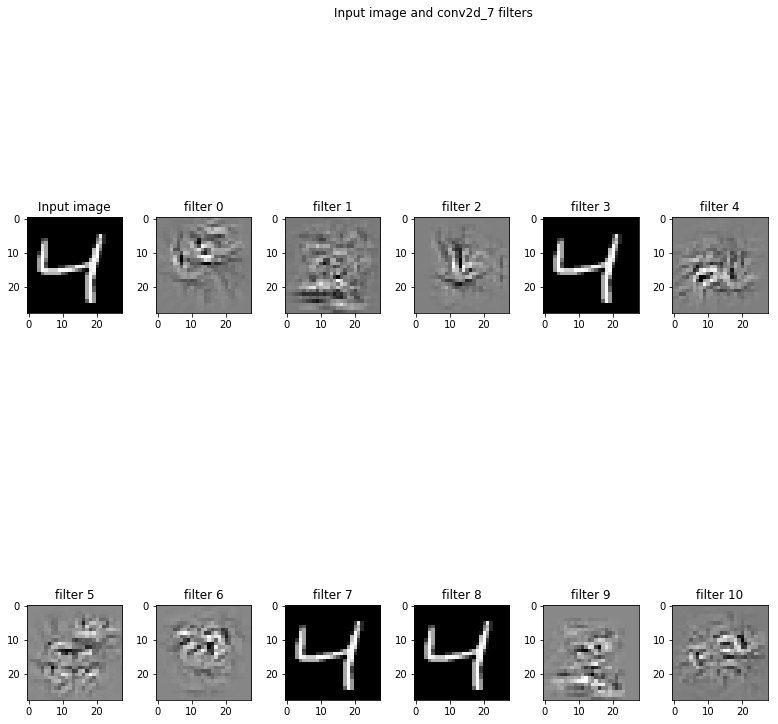

In [23]:
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_7')

Visualization of the 7th convolution layer ( 3x3x10x32 kernel ). One can see that the exact input image itself shows up in many kernels. This is surprising. I currently dont understand the significance of it